In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics
pd.set_option('display.max_columns', None)
import seaborn as sns


In [ ]:
!pip install keplergl --quiet

In [ ]:
from keplergl import KeplerGl

In [ ]:
!pip install kmodes --quiet

# Data Loading + Preprocessing

Not using feature selection because all of the questions are necessary to the

In [ ]:
#read data into dataframe
data = pd.read_csv("/content/mock_data_rubric.csv")

In [ ]:
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Program Name   800 non-null    object 
 1   D1_Q1          800 non-null    object 
 2   D1_Q2          800 non-null    object 
 3   D1_Q3          800 non-null    object 
 4   D1_Q4          800 non-null    object 
 5   D2_Q1          800 non-null    object 
 6   D2_Q2          800 non-null    object 
 7   D2_Q3          800 non-null    object 
 8   D2_Q4          800 non-null    object 
 9   D3_Q1          800 non-null    object 
 10  D3_Q2          800 non-null    object 
 11  D3_Q3          800 non-null    object 
 12  D3_Q4          800 non-null    object 
 13  D4_Q1          800 non-null    object 
 14  D4_Q2          800 non-null    object 
 15  D4_Q3          800 non-null    object 
 16  D4_Q4          800 non-null    object 
 17  D5_Q1          800 non-null    object 
 18  D5_Q2     

In [ ]:
# make sure there are no na values present
data.dropna(inplace=True)
# normally we would check for duplicates, but since ideally the data is self submitted, there could be duplicate values for the rubric which makes sense realistically

In [ ]:
# dropping the average score column, since it won't be used
data.drop('Average_Score',axis=1, inplace=True)

# Exploratory Data Analysis

In [ ]:
# we want to bridge the college scorecard data with the esports program data, but right now there is no

In [ ]:
selected_features = ['UNITID', 'OPEID', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'ACCREDAGENCY', 'NUMBRANCH', 'HIGHDEG', 'LOCALE', 'LATITUDE', 'LONGITUDE']
school_data = pd.read_csv('/content/Most-Recent-Cohorts-Institution_05192025.csv',low_memory=False)

/tmp/ipython-input-67-2766606519.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=school_data['ACCREDAGENCY'],palette='Set2')


<Axes: ylabel='ACCREDAGENCY'>

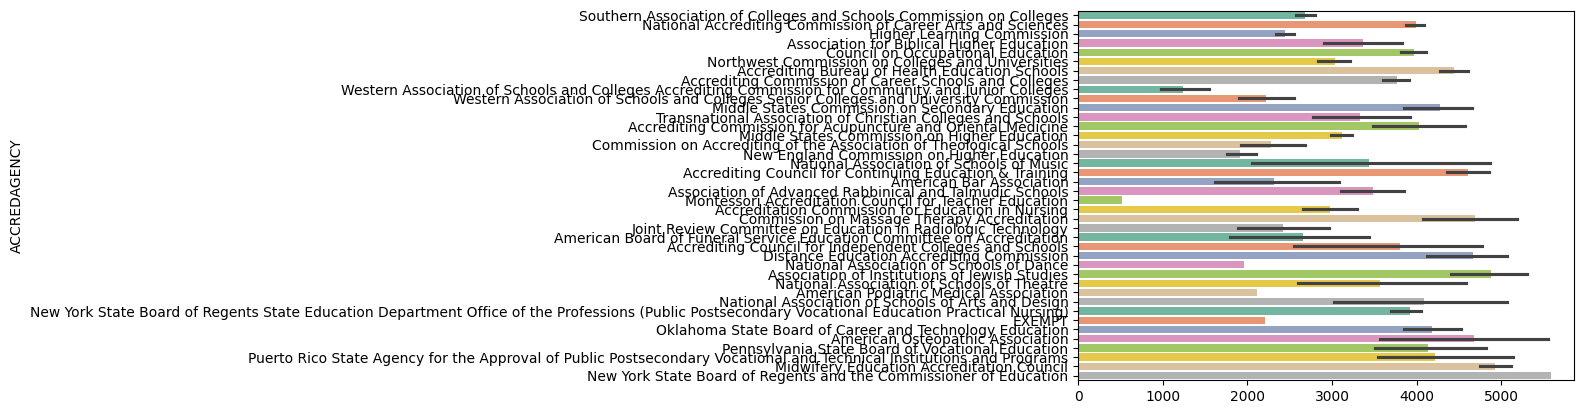

In [ ]:
sns.barplot(data=school_data['ACCREDAGENCY'],palette='Set2')

<Axes: ylabel='NUMBRANCH'>

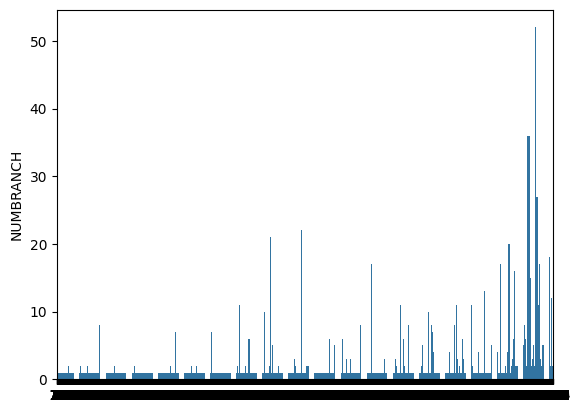

In [ ]:
sns.barplot(data=school_data['NUMBRANCH'])

In [ ]:
school_map_data = school_data.replace([ np.inf, -np.inf],np.nan).dropna(subset=['LATITUDE','LONGITUDE'])

In [ ]:
school_map_data = school_data.loc[:, ['LATITUDE','LONGITUDE']]
school_map_data['LATITUDE'] = school_map_data['LATITUDE'].astype(str)
school_map_data['LONGITUDE'] = school_map_data['LONGITUDE'].astype(str)

In [ ]:
school_map_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429 entries, 0 to 6428
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LATITUDE   6429 non-null   object
 1   LONGITUDE  6429 non-null   object
dtypes: object(2)
memory usage: 100.6+ KB


In [ ]:
school_data.head()

UNITID      OPEID   OPEID6                               INSTNM  \
0  100654   100200.0   1002.0             Alabama A & M University   
1  100663   105200.0   1052.0  University of Alabama at Birmingham   
2  100690  2503400.0  25034.0                   Amridge University   
3  100706   105500.0   1055.0  University of Alabama in Huntsville   
4  100724   100500.0   1005.0             Alabama State University   

         CITY STABBR         ZIP  \
0      Normal     AL       35762   
1  Birmingham     AL  35294-0110   
2  Montgomery     AL  36117-3553   
3  Huntsville     AL       35899   
4  Montgomery     AL  36104-0271   

                                        ACCREDAGENCY  \
0  Southern Association of Colleges and Schools C...   
1  Southern Association of Colleges and Schools C...   
2  Southern Association of Colleges and Schools C...   
3  Southern Association of Colleges and Schools C...   
4  Southern Association of Colleges and Schools C...   

                              INSTURL  \
0                       www.aamu.edu/   
1                https://www.uab.edu/   
2  https://www.amridgeuniversity.edu/   
3                        www.uah.edu/   
4                      www.alasu.edu/   

                                              NPCURL  SCH_DEG  HCM2  MAIN  \
0  www.aamu.edu/admissions-aid/tuition-fees/net-p...      3.0     0     1   
1  https://tcc.ruffalonl.com/University of Alabam...      3.0     0     1   
2           https://www2.amridgeuniversity.edu:9091/      3.0     0     1   
3                                    finaid.uah.edu/      3.0     0     1   
4  www.alasu.edu/cost-aid/tuition-costs/net-price...      3.0     0     1   

   NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION  LOCALE  LOCALE2  \
0          1        3        4        1        1       5    12.0      NaN   
1          1        3        4        1        1       5    12.0      NaN   
2          1        3        4        2        1       5    12.0      NaN   
3          1        3        4        1        1       5    12.0      NaN   
4          1        3        4        1        1       5    12.0      NaN   

    LATITUDE  LONGITUDE  CCBASIC  CCUGPROF  CCSIZSET  HBCU  PBI  ANNHI  \
0  34.783368 -86.568502     18.0      10.0      14.0   1.0  0.0    0.0   
1  33.505697 -86.799345     15.0       9.0      15.0   0.0  0.0    0.0   
2  32.362609 -86.174010     20.0       5.0       6.0   0.0  0.0    0.0   
3  34.724557 -86.640449     15.0      15.0      13.0   0.0  0.0    0.0   
4  32.364317 -86.295677     17.0      10.0      14.0   1.0  0.0    0.0   

   TRIBAL  AANAPII  HSI  NANTI  MENONLY  WOMENONLY  RELAFFIL  ADM_RATE  \
0     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.6622   
1     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.8842   
2     0.0      0.0  0.0    0.0      0.0        0.0      74.0       NaN   
3     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.7425   
4     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.9564   

   ADM_RATE_ALL  SATVR25  SATVR75  SATMT25  SATMT75  SATWR25  SATWR75  \
0      0.662209    420.0    540.0    390.0    520.0    370.0    457.0   
1      0.884238    570.0    700.0    560.0    700.0      NaN      NaN   
2           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      0.742509    595.0    700.0    600.0    740.0      NaN      NaN   
4      0.956416    444.0    538.0    421.0    531.0      NaN      NaN   

   SATVRMID  SATMTMID  SATWRMID  ACTCM25  ACTCM75  ACTEN25  ACTEN75  ACTMT25  \
0     475.0     460.0     414.0     14.0     19.0     13.0     20.0     14.0   
1     637.0     644.0       NaN     22.0     30.0     22.0     33.0     20.0   
2       NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN   
3     640.0     655.0       NaN     25.0     31.0     24.0     33.0     24.0   
4     488.0     457.0       NaN     16.0     20.0     15.0     21.0     15.0   

   ACTMT75  ACTWR25  ACTWR75  ACTCMMID  ACTEN

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
school_map = KeplerGl(height=500)
school_map.add_data(school_data, name='school_data')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [ ]:
school_map

KeplerGl(data={'school_data': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,…

# Predictive Models
Using Random Forest Classifier because the dataset is highly dimensional categorical data.

In [ ]:
data_cluster = data.copy()

In [ ]:
data_cluster.head()

,Program Name,D1_Q1,D1_Q2,D1_Q3,D1_Q4,D2_Q1,D2_Q2,D2_Q3,D2_Q4,D3_Q1,D3_Q2,D3_Q3,D3_Q4,D4_Q1,D4_Q2,D4_Q3,D4_Q4,D5_Q1,D5_Q2,D5_Q3,D5_Q4,D6_Q1,D6_Q2,D6_Q3,D6_Q4,D7_Q1,D7_Q2,D7_Q3,D7_Q4,Division
0,Generated Program,"Fully institutionalized, including multiple fu...",Clearly housed within a defined institutional ...,Model alignment exemplifying institutional bes...,"Comprehensive, robust processes ensuring full ...","Spaces are fully purpose-built, professionally...","Equipment is state-of-the-art, high-performanc...",Dedicated spaces support regular community gat...,Professional-grade production studios and comp...,"We have a robust, adaptive budget that fully s...","Comprehensive, competitive scholarships are fu...",Our program employs a fully professionalized t...,Our fundraising activities are strategically p...,Sustained national prominence and leadership a...,Structured recruitment with regular external o...,Comprehensive coaching system essential to sus...,"Highly effective, structured talent developmen...",Comprehensive eligibility standards are rigoro...,"Comprehensive and exemplary in clarity, adapti...",Structured mechanisms are in place and are reg...,"Extensive, transparent, and consistently updat...","Central, unifying force significantly shaping ...","Sustained, influential engagement significantl...",Significant contribution to campus culture and...,"Highly structured, strategic, and influential ...","Comprehensive, fully integrated support for st...",Seamlessly integrated into all aspects of the ...,Regular structured opportunities explicitly li...,Fully integrated and seamlessly coordinated wi...,Division 1
1,Generated Program,"Fully institutionalized, including multiple fu...",Permanently integrated with clear positioning.,Consistent alignment.,"Comprehensive, robust processes ensuring full ...","Spaces are fully purpose-built, professionally...","Equipment is state-of-the-art, high-performanc...","Vibrant, versatile spaces exist and are design...",Professional-grade production studios and comp...,"We have a robust, adaptive budget that fully s...","Comprehensive, competitive scholarships are fu...",Our staff includes one or two funded full-time...,"We have well-established, diverse revenue-gene...",Sustained national prominence and leadership a...,Highly structured recruitment attracting top e...,Comprehensive coaching system essential to sus...,Structured development promoting continuous co...,Comprehensive eligibility standards are rigoro...,"Comprehensive and exemplary in clarity, adapti...",Robust oversight with consistent enforcement a...,"Extensive, transparent, and consistently updat...","Central, unifying force significantly shaping ...","Sustained, influential engagement significantl...",Widely recognized leader with major cultural i...,Regularly structured strategy actively integra...,"Comprehensive, fully integrated support for st...",Seamlessly integrated into all aspects of the ...,Regular structured opportunities explicitly li...,Fully integrated and seamlessly coordinated wi...,Division 1
2,Generated Program,"Fully institutionalized, including multiple fu...",Permanently integrated with clear positioning.,Model alignment exemplifying institutional bes...,"Comprehensive, robust processes ensuring full ...","Spaces are fully purpose-built, professionally...","Equipment is state-of-the-art, high-performanc...","Vibrant, versatile spaces exist and are design...",Professional-grade production studios and comp...,"We have a robust, adaptive budget that fully s...","Comprehensive, competitive scholarships are fu...",Our program employs a fully professionalized t...,"We have well-established, diverse revenue-gene...",Sustained national prominence and leadership a...,Structured recruitment with regular external o...,Comprehensive coaching system essential to sus...,"Highly effective, structured talent developmen...",Comprehensive eligibility standards are rigoro...,"Comprehensive and exemplary in clarity, 

In [ ]:
# initialize label encoder dictionary
encoded_labels = {}
# encode the
columns_to_encode = data.iloc[:,1:]

# for each column that we want to encode,
for column in columns_to_encode.columns:
  le = LabelEncoder()
  data[column] = le.fit_transform(data[column])
  encoded_labels[column] = dict(zip(le.classes_, le.transform(le.classes_)))

In [ ]:
print(encoded_labels)

{'D1_Q1': {'Emerging, typically held by an organized group of students, or a graduate assistant.': np.int64(0), 'Established, supported by paid staff positions with overlapping roles.': np.int64(1), 'Fully institutionalized, including multiple full-time staff, each with delineated roles.': np.int64(2), 'Informal, dependent on unorganized individuals.': np.int64(3)}, 'D1_Q2': {'Clearly housed within a defined institutional unit.': np.int64(0), 'Limited integration.': np.int64(1), 'Not integrated, the program has no clear space within institutional structures.': np.int64(2), 'Permanently integrated with clear positioning.': np.int64(3)}, 'D1_Q3': {'Consistent alignment.': np.int64(0), 'Decisions made independently, without alignment.': np.int64(1), 'Model alignment exemplifying institutional best practices.': np.int64(2), 'Occasional alignment.': np.int64(3)}, 'D1_Q4': {'Comprehensive, robust processes ensuring full continuity and sustainability.': np.int64(0), 'Established processes exi

In [ ]:
# check to see if the encoding worked
data.head()

,Program Name,D1_Q1,D1_Q2,D1_Q3,D1_Q4,D2_Q1,D2_Q2,D2_Q3,D2_Q4,D3_Q1,D3_Q2,D3_Q3,D3_Q4,D4_Q1,D4_Q2,D4_Q3,D4_Q4,D5_Q1,D5_Q2,D5_Q3,D5_Q4,D6_Q1,D6_Q2,D6_Q3,D6_Q4,D7_Q1,D7_Q2,D7_Q3,D7_Q4,Division
0,Generated Program,2,0,2,0,1,3,1,3,1,0,0,0,3,3,0,0,2,1,3,0,0,3,1,0,0,3,3,1,0
1,Generated Program,2,3,0,0,1,3,3,3,1,0,2,2,3,0,0,3,2,1,2,0,0,3,3,3,0,3,3,1,0
2,Generated Program,2,3,2,0,1,3,3,3,1,0,0,2,3,3,0,0,2,1,2,1,0,1,3,0,3,3,0,1,0
3,Generated Program,2,3,2,1,1,3,3,0,1,0,2,2,3,0,1,0,2,1,2,0,0,3,3,3,0,3,3,1,0
4,Generated Program,2,3,2,0,1,3,3,3,1,0,0,0,3,0,1,0,2,1,2,1,0,3,3,3,0,3,0,3,0


In [ ]:
# target variable
y = data['Division']
# independent variables
X = data.drop(['Division','Program Name'], axis=1)

In [ ]:
# split into testing training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)

In [ ]:
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=.5,random_state=42)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875


In [ ]:
# import necessary modules for k folds cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#set the number of k folds, perform k fold cross validation
k = 10
kf = KFold(n_splits=k,shuffle=True,random_state=42)

In [ ]:
# evaluate the model on the validation set
y_val_predictions = rf.predict(X_val)
val = accuracy_score(y_val,y_val_predictions)
print(val)

0.95


In [ ]:
# get the accuracy scores for k fold cross validation
k_fold_score = cross_val_score(rf,X_train,y_train, cv=kf,scoring='accuracy')
print("K Fold Accuracy\n" + str(k_fold_score) + "\n")
# f1 score
k_fold_score = cross_val_score(rf,X_train,y_train, cv=kf,scoring='f1_macro')
print("K Fold F1\n" + str(k_fold_score) + "\n")
# roc auc
k_fold_score = cross_val_score(rf,X_train,y_train, cv=kf,scoring='roc_auc_ovr')
print("K Fold ROC OVR\n" + str(k_fold_score) + "\n")

K Fold Accuracy
[0.890625 1.       0.9375   0.953125 0.9375   0.953125 0.890625 0.9375
 0.953125 0.953125]

K Fold F1
[0.91590909 0.95227273 0.94602273 0.91621622 0.96428571 0.94994944
 0.88854489 0.95386766 0.92910256 0.90625   ]

K Fold ROC OVR
[0.97938456 1.         0.98956642 0.98204027 0.99335657 0.99613044
 0.98429952 0.98499687 0.99160111 0.99804688]



K-Modes Clustering

In [ ]:
data_cluster.head()

,Program Name,D1_Q1,D1_Q2,D1_Q3,D1_Q4,D2_Q1,D2_Q2,D2_Q3,D2_Q4,D3_Q1,D3_Q2,D3_Q3,D3_Q4,D4_Q1,D4_Q2,D4_Q3,D4_Q4,D5_Q1,D5_Q2,D5_Q3,D5_Q4,D6_Q1,D6_Q2,D6_Q3,D6_Q4,D7_Q1,D7_Q2,D7_Q3,D7_Q4,Division
0,Generated Program,"Fully institutionalized, including multiple fu...",Clearly housed within a defined institutional ...,Model alignment exemplifying institutional bes...,"Comprehensive, robust processes ensuring full ...","Spaces are fully purpose-built, professionally...","Equipment is state-of-the-art, high-performanc...",Dedicated spaces support regular community gat...,Professional-grade production studios and comp...,"We have a robust, adaptive budget that fully s...","Comprehensive, competitive scholarships are fu...",Our program employs a fully professionalized t...,Our fundraising activities are strategically p...,Sustained national prominence and leadership a...,Structured recruitment with regular external o...,Comprehensive coaching system essential to sus...,"Highly effective, structured talent developmen...",Comprehensive eligibility standards are rigoro...,"Comprehensive and exemplary in clarity, adapti...",Structured mechanisms are in place and are reg...,"Extensive, transparent, and consistently updat...","Central, unifying force significantly shaping ...","Sustained, influential engagement significantl...",Significant contribution to campus culture and...,"Highly structured, strategic, and influential ...","Comprehensive, fully integrated support for st...",Seamlessly integrated into all aspects of the ...,Regular structured opportunities explicitly li...,Fully integrated and seamlessly coordinated wi...,Division 1
1,Generated Program,"Fully institutionalized, including multiple fu...",Permanently integrated with clear positioning.,Consistent alignment.,"Comprehensive, robust processes ensuring full ...","Spaces are fully purpose-built, professionally...","Equipment is state-of-the-art, high-performanc...","Vibrant, versatile spaces exist and are design...",Professional-grade production studios and comp...,"We have a robust, adaptive budget that fully s...","Comprehensive, competitive scholarships are fu...",Our staff includes one or two funded full-time...,"We have well-established, diverse revenue-gene...",Sustained national prominence and leadership a...,Highly structured recruitment attracting top e...,Comprehensive coaching system essential to sus...,Structured development promoting continuous co...,Comprehensive eligibility standards are rigoro...,"Comprehensive and exemplary in clarity, adapti...",Robust oversight with consistent enforcement a...,"Extensive, transparent, and consistently updat...","Central, unifying force significantly shaping ...","Sustained, influential engagement significantl...",Widely recognized leader with major cultural i...,Regularly structured strategy actively integra...,"Comprehensive, fully integrated support for st...",Seamlessly integrated into all aspects of the ...,Regular structured opportunities explicitly li...,Fully integrated and seamlessly coordinated wi...,Division 1
2,Generated Program,"Fully institutionalized, including multiple fu...",Permanently integrated with clear positioning.,Model alignment exemplifying institutional bes...,"Comprehensive, robust processes ensuring full ...","Spaces are fully purpose-built, professionally...","Equipment is state-of-the-art, high-performanc...","Vibrant, versatile spaces exist and are design...",Professional-grade production studios and comp...,"We have a robust, adaptive budget that fully s...","Comprehensive, competitive scholarships are fu...",Our program employs a fully professionalized t...,"We have well-established, diverse revenue-gene...",Sustained national prominence and leadership a...,Structured recruitment with regular external o...,Comprehensive coaching system essential to sus...,"Highly effective, structured talent developmen...",Comprehensive eligibility standards are rigoro...,"Comprehensive and exemplary in clarity, 

In [ ]:
from kmodes.kmodes import KModes

In [ ]:
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

In [ ]:
clusters = km.fit_predict(data_cluster)
data_cluster['Cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 188, cost: 9904.0
Run 1, iteration: 2/100, moves: 37, cost: 9888.0
Run 1, iteration: 3/100, moves: 15, cost: 9879.0
Run 1, iteration: 4/100, moves: 4, cost: 9879.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 214, cost: 9958.0
Run 2, iteration: 2/100, moves: 73, cost: 9921.0
Run 2, iteration: 3/100, moves: 34, cost: 9921.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 179, cost: 10016.0
Run 3, iteration: 2/100, moves: 96, cost: 9911.0
Run 3, iteration: 3/100, moves: 38, cost: 9889.0
Run 3, iteration: 4/100, moves: 14, cost: 9889.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 245, cost: 10122.0
Run 4, iteration: 2/100, moves: 83, cost: 10086.0
Run 4, iteration: 3/100, moves: 32, c

In [ ]:
print(km.cluster_centroids_)

[['Generated Program'
  'Established, supported by paid staff positions with overlapping roles.'
  'Limited integration.' 'Consistent alignment.'
  'Comprehensive, robust processes ensuring full continuity and sustainability.'
  'Spaces are dedicated primarily to esports, but their design offers minimal esports-specific functionality.'
  'Equipment is outdated, unreliable, and often insufficient for consistent competitive play.'
  'Little to no designated spaces exist for community engagement or recreational gaming activities.'
  'Minimal or improvised setups allow for occasional broadcasting with limited production quality.'
  'We maintain a modest budget covering fundamental costs like basic equipment, travel, and league fees.'
  'Partial or full scholarships are consistently available and integrated into our program’s financial model.'
  'Our program employs a fully professionalized team of full-time staff with clearly defined, specialized roles.'
  'We supplement institutional fund

In [ ]:
for cluster in range(km.n_clusters):
  print(f"\n Cluster {cluster}:")
  cluster_data = data_cluster[data_cluster['Cluster'] == cluster]
  print(cluster_data.describe(include='all'))


 Cluster 0:
             Program Name                                              D1_Q1  \
count                 110                                                110   
unique                  1                                                  4   
top     Generated Program  Established, supported by paid staff positions...   
freq                  110                                                 45   
mean                  NaN                                                NaN   
std                   NaN                                                NaN   
min                   NaN                                                NaN   
25%                   NaN                                                NaN   
50%                   NaN                                                NaN   
75%                   NaN                                                NaN   
max                   NaN                                                NaN   

                       D1_